# Лабораторная работа №1 «Введение в Qiskit»


### Вариант 2

Выполнил Проскуряков Роман Владимирович

In [2]:
!pip install qiskit qiskit-aer --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.7 MB/s eta 0:00:00


In [3]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.visualization import plot_histogram
import qiskit.quantum_info as qi
import matplotlib.pyplot as plt

Результаты измерений: {'0': 515, '1': 485}


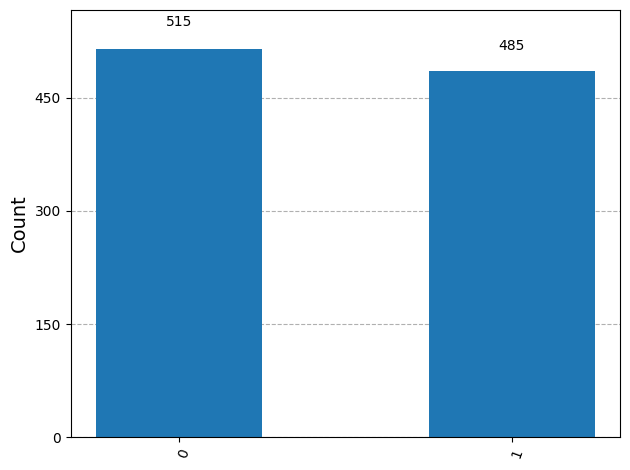

In [4]:
qc = QuantumCircuit(1, 1)
qc.h(0)

qc.measure(0, 0)

simulator = AerSimulator()
result = simulator.run(qc, shots=1000).result()
counts = result.get_counts()

print("Результаты измерений:", counts)
plot_histogram(counts)

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 
Результаты измерений: {'11': 487, '00': 513}


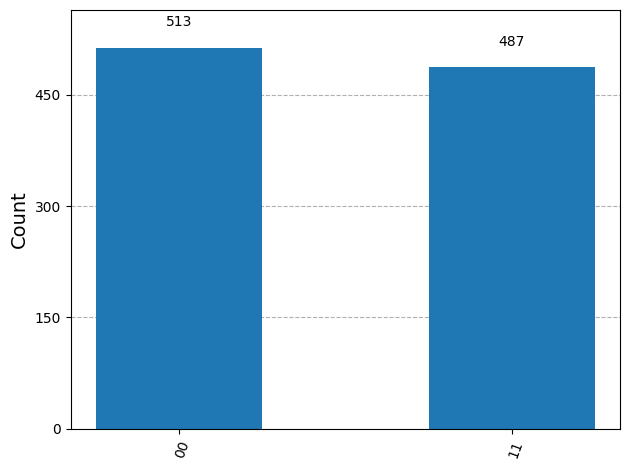

In [5]:
  # 2 кубита, 2 классических бита
qc = QuantumCircuit(2, 2)
# Подготовим кубиты в запутанном состоянии
qc.h(0)
qc.cx(0, 1)
# Измерим оба кубита
qc.measure([0, 1], [0, 1])

print(qc.draw())

simulator = AerSimulator()
result = simulator.run(qc, shots=1000).result()
counts = result.get_counts()

print("Результаты измерений:", counts)
plot_histogram(counts)


Изначально старший бит в состоянии 0. И он переходит в 1 только когдамладший бит тоже 1 (гейт cx). Так оба бита принимают всегда одинаковые значения.

In [6]:
def simulate(qc, shots=1024):
    simulator = AerSimulator()
    result = simulator.run(qc, shots=shots).result()
    counts = result.get_counts()
    print("Результаты измерений:", counts)
    return counts

def draw_and_simulate(qc, title):
    print(f"{title}")
    print(qc.draw(output='text'))  # текстовая визуализация схемы
    return simulate(qc)

def go(qc, title="", shots=1024, noise_model=None):
    print(f"{title}")
    print(qc.draw(output='text'))  # текстовая визуализация схемы
    simulator = AerSimulator(noise_model=noise_model)
    result = simulator.run(qc, shots=shots).result()
    counts = result.get_counts()
    print("Результаты измерений:", counts)
    return counts

In [7]:
qc_h = QuantumCircuit(1, 1)
qc_h.h(0)
qc_h.measure(0, 0)

draw_and_simulate(qc_h, "Hadamard gate")

Hadamard gate
     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 
Результаты измерений: {'0': 506, '1': 518}


{'0': 506, '1': 518}

## Симуляция двух кубитов с добавленными шумами

NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['cx', 'h']
  Qubits with noise: [0, 1]
  Specific qubit errors: [('h', (0,)), ('cx', (0, 1))]
Симуляция двух кубитов с добавленными шумами
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 
Результаты измерений: {'00': 428, '10': 81, '11': 436, '01': 79}


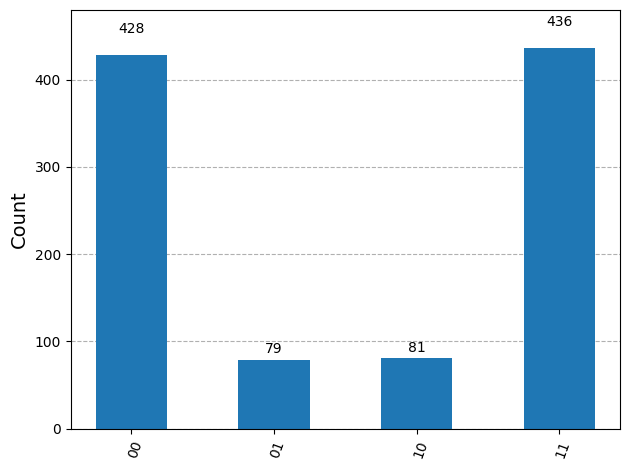

In [15]:
# 2 кубита, 2 классических бита
qc = QuantumCircuit(2, 2)

my_noise_model = NoiseModel()

# Добавляем 1-кубитный шум к H-гейту
my_noise_model.add_quantum_error(depolarizing_error(0.2, 1), ['h'], [0])

# Добавляем 2-кубитный шум к CX-гейту
my_noise_model.add_quantum_error(depolarizing_error(0.3, 2), ['cx'], [0, 1])

print(my_noise_model)

# Подготовим кубиты в запутанном состоянии
qc.h(0)
qc.cx(0, 1)
# Измерим оба кубита
qc.measure([0, 1], [0, 1])

plot_histogram(go(qc, title="Симуляция двух кубитов с добавленными шумами", noise_model=my_noise_model))

Должно быть только две колонки '00' и '11' но из за шумов иногда логика работы гейтов нарушается.

## Симуляция трёх кубитов с добавленными шумами

NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['cx', 'h']
  Qubits with noise: [0, 1, 2]
  Specific qubit errors: [('h', (0,)), ('cx', (0, 1)), ('cx', (1, 2))]
Симуляция трёх кубитов с добавленными шумами
     ┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2 
Результаты измерений: {'100': 49, '001': 93, '101': 38, '010': 47, '000': 353, '110': 90, '011': 39, '111': 315}


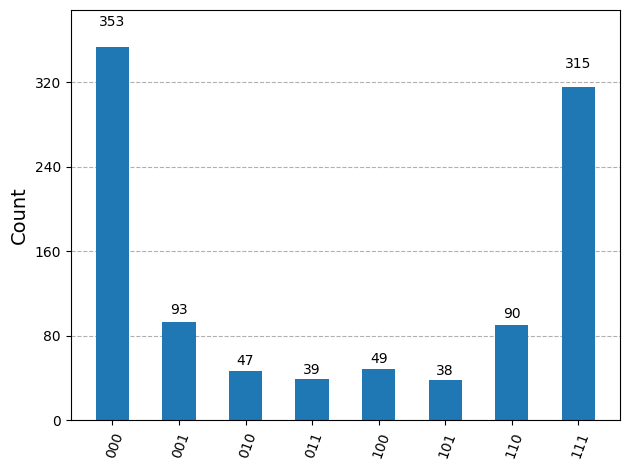

In [9]:
qc = QuantumCircuit(3, 3)

my_noise_model = NoiseModel()

my_noise_model.add_quantum_error(depolarizing_error(0.2, 1), ['h'], [0])

# Добавляем 2-кубитный шум к обоим CX-гейтам
my_noise_model.add_quantum_error(depolarizing_error(0.3, 2), ['cx'], [0, 1])
my_noise_model.add_quantum_error(depolarizing_error(0.3, 2), ['cx'], [1, 2])

print(my_noise_model)

qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)

qc.measure([0, 1, 2], [0, 1, 2])

plot_histogram(go(qc, title="Симуляция трёх кубитов с добавленными шумами", noise_model=my_noise_model))

## Реализация гейта OR

| A | B | A OR B |
|---|---|--------|
| 0 | 0 |   0    |
| 0 | 1 |   1    |
| 1 | 0 |   1    |
| 1 | 1 |   1    |

In [10]:
# qc = QuantumCircuit(2, 2)

# or_op = qi.Operator([[1, 0, 0, 0],
#                      [0, 0, 0, 1],
#                      [0, 0, 0, 1],
#                      [0, 1, 1, 0]])

# qc.unitary(or_op, [0, 1], label='or')

# qc.measure([0, 1], [0, 1])

# go(qc, "Гейт OR", 1)

Гейт OR
     ┌───┐┌───┐     ┌───┐┌─┐      
q_0: ┤ H ├┤ X ├──■──┤ X ├┤M├──────
     ├───┤├───┤  │  ├───┤└╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├─╫─┤M├───
     └───┘└───┘┌─┴─┐├───┤ ║ └╥┘┌─┐
q_2: ──────────┤ X ├┤ X ├─╫──╫─┤M├
               └───┘└───┘ ║  ║ └╥┘
c: 3/═════════════════════╩══╩══╩═
                          0  1  2 
Результаты измерений: {'000': 256, '111': 241, '110': 270, '101': 257}


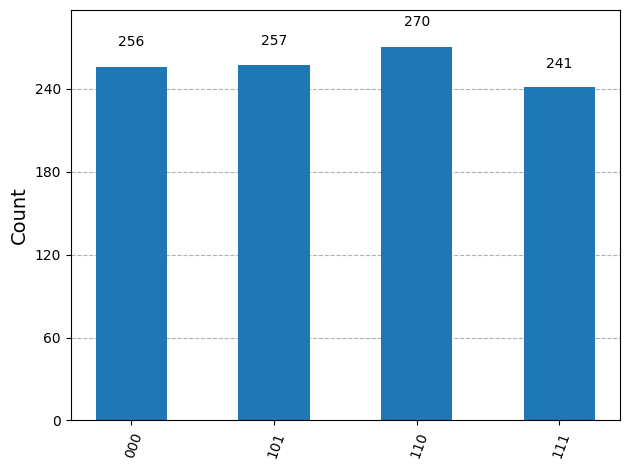

In [11]:
qc = QuantumCircuit(3, 3)

qc.h(0)
qc.h(1)

# Для проверки зададим исходным битам известные значения
# qc.x(0) # первый бит
# qc.x(1) # второй бит
# исход должен быть в третьем бите

# 1. Инвертируем оба входа
qc.x(0)
qc.x(1)

# 2. Применяем Toffoli (CCNOT) к инвертированным входам
#    Результат сохраняется в 2
qc.ccx(0, 1, 2)

# 3. Восстанавливаем исходные значения входов
qc.x(0)
qc.x(1)

# 4. Инвертируем результат
qc.x(2)

qc.measure([0, 1, 2], [0, 1, 2])

plot_histogram(go(qc, "Гейт OR"))

## Реализация гейта NOT

| A | NOT A |
|---|-------|
| 0 |   1   |
| 1 |   0   |

In [12]:
qc = QuantumCircuit(1, 1)

# qc.h(0)
qc.x(0)

qc.measure([0], [0])

go(qc, "Гейт NOT", 1)

Гейт NOT
     ┌───┐┌─┐
  q: ┤ X ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 
Результаты измерений: {'1': 1}


{'1': 1}

## Реализация гейта CCNOT (Toffoli)

**Трехбитный** обратимый гейт. Первые два входа — управляющие (control). Третий вход — целевой (target), который инвертируется **только если** оба управляющих входа равны 1.

| A (control1) | B (control2) | C (target) | A' | B' | C' |
|---|---|---|---|---|---|
| 0 | 0 | 0 | 0 | 0 | **0** |
| 0 | 0 | 1 | 0 | 0 | **1** |
| 0 | 1 | 0 | 0 | 1 | **0** |
| 0 | 1 | 1 | 0 | 1 | **1** |
| 1 | 0 | 0 | 1 | 0 | **0** |
| 1 | 0 | 1 | 1 | 0 | **1** |
| 1 | 1 | 0 | 1 | 1 | **1** |
| 1 | 1 | 1 | 1 | 1 | **0** |

Гейт CCNOT
     ┌───┐     ┌─┐      
q_0: ┤ H ├──■──┤M├──────
     ├───┤  │  └╥┘┌─┐   
q_1: ┤ H ├──■───╫─┤M├───
     └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ─────┤ X ├─╫──╫─┤M├
          └───┘ ║  ║ └╥┘
c: 3/═══════════╩══╩══╩═
                0  1  2 
Результаты измерений: {'000': 242, '010': 245, '111': 272, '001': 265}


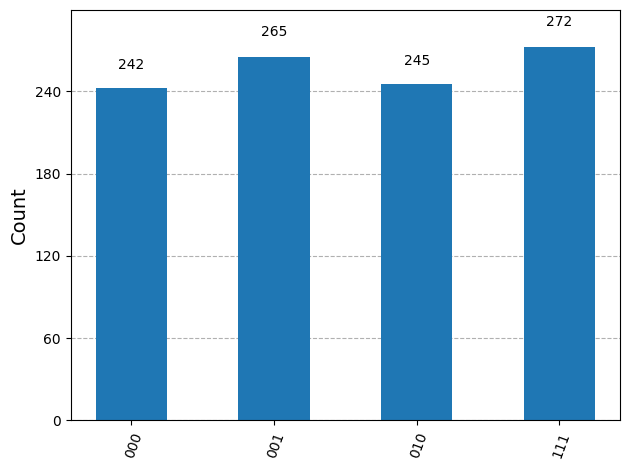

In [13]:
qc = QuantumCircuit(3, 3)

qc.h(0)
qc.h(1)
qc.ccx(0, 1, 2)
qc.measure([0, 1, 2], [0, 1, 2])

plot_histogram(go(qc, "Гейт CCNOT"))

## Реализация гейта CSWAP (гейт Фредкина)

**Трехбитный** обратимый гейт. Первый вход — управляющий (control). Два других входа — целевые (target), которые **меняются местами, если управляющий вход равен 1**.

| A (control) | X (target) | Y (target) | A' | X' | Y' |
|---|---|---|---|---|---|
| 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 1 | 0 | 0 | 1 |
| 0 | 1 | 0 | 0 | 1 | 0 |
| 0 | 1 | 1 | 0 | 1 | 1 |
| **1** | 0 | 0 | **1** | 0 | 0 |
| **1** | 0 | 1 | **1** | **1** | **0** |
| **1** | 1 | 0 | **1** | **0** | **1** |
| **1** | 1 | 1 | **1** | 1 | 1 |


Гейт CSWAP
     ┌───┐   ┌─┐      
q_0: ┤ H ├─■─┤M├──────
     ├───┤ │ └╥┘┌─┐   
q_1: ┤ X ├─X──╫─┤M├───
     └───┘ │  ║ └╥┘┌─┐
q_2: ──────X──╫──╫─┤M├
              ║  ║ └╥┘
c: 3/═════════╩══╩══╩═
              0  1  2 
Результаты измерений: {'101': 2000, '010': 2000}


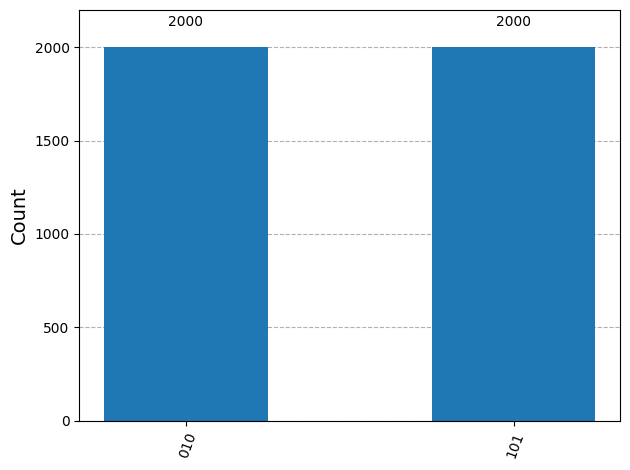

In [14]:
qc = QuantumCircuit(3, 3)

qc.h(0)
qc.x(1)
qc.cswap(0, 1, 2)
qc.measure([0, 1, 2], [0, 1, 2])

plot_histogram(go(qc, "Гейт CSWAP", 4000))